In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
np.random.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
from simpleLayer import simpleLayer
testLay = simpleLayer(0,50,200)

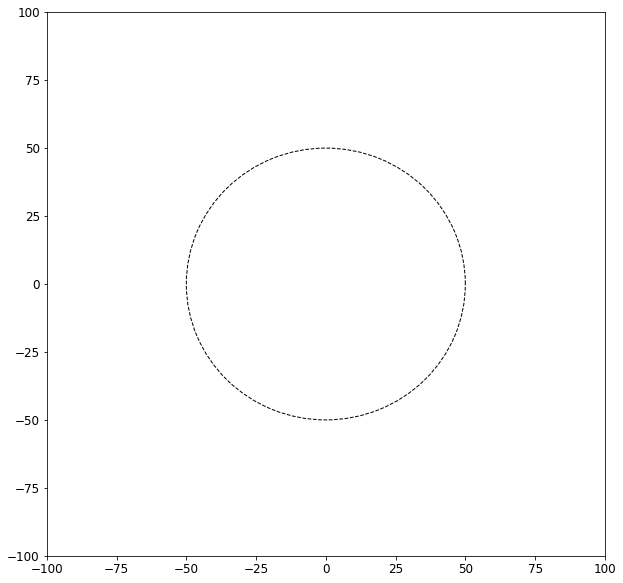

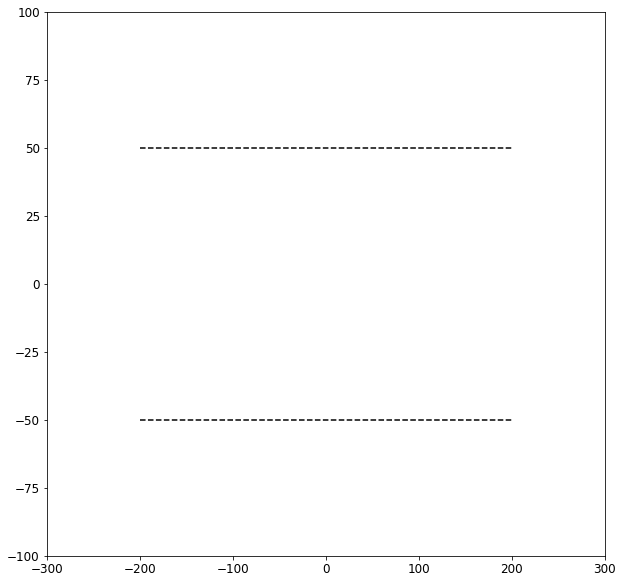

In [3]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

testLay.drawDetectorXY(ax)


fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 100
ax.set_xlim((-300, 300))
ax.set_ylim((-1*zoom, zoom))
testLay.drawDetectorZR(ax)

#plt.plot([testLay.layerR,-testLay.layerR],[-testLay.lengthZ,testLay.lengthZ])
#testLay.drawDetectorRZ(ax)

/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:39: RuntimeWarning: invalid value encountered in sqrt
  yp = yc+np.sqrt(r**2-(x-xc)**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:41: RuntimeWarning: invalid value encountered in sqrt
  ym = yc-np.sqrt(r**2-(x-xc)**2)


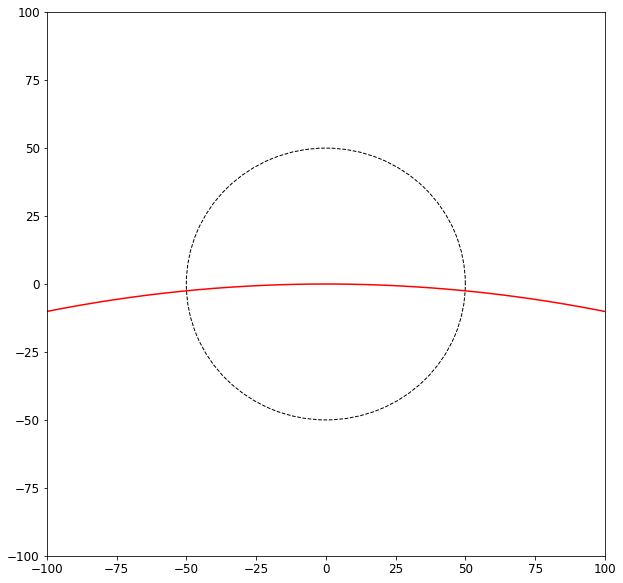

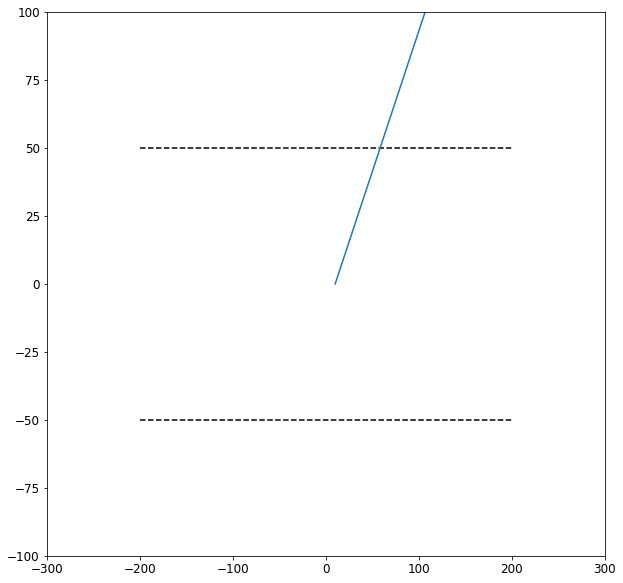

In [4]:
from TrackHelper import drawTrackXY
from TrackHelper import drawTrackZR


fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

testLay.drawDetectorXY(ax)

phi=0
pt=500
drawTrackXY(pt,phi,+1,scale=1000)



fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 100
ax.set_xlim((-300, 300))
ax.set_ylim((-1*zoom, zoom))
testLay.drawDetectorZR(ax) 

z0 = 10
theta = np.pi/4
slopeRZ = np.tan(theta)
xs = [z0,300]
ys = [0,slopeRZ*300]
plt.plot(xs,ys)

#for pt in [5]:
#    for phi in [0]:
#        drawTrack(pt,phi,+1)
#        xs, ys = detGeo.getHits(pt,phi,+1)
#        plt.plot(xs,ys,'ro')
#        
#        
#        drawTrack(pt,phi,-1)        
#        xs, ys = detGeo.getHits(pt,phi,-1)        
#        plt.plot(xs,ys,'ro')

In [5]:
rDet = np.array([ 50, 100, 150, 200, 250, 300])
#zDet = np.array([200, 200, 300, 300, 400, 400])
m = np.tan(1*np.pi/4)
print(m)
z0 = 170
zDet = []
for r in rDet: 
    zDet.append((r+m*z0)/m)
zDet = np.array(zDet)
print(zDet)
from simpleDetectorGeo import simpleDetectorGeo
detGeo = simpleDetectorGeo(rDet,zDet)


0.9999999999999999
[220. 270. 320. 370. 420. 470.]


[ 49.93746089  99.49874371 148.3028995  195.95917942 242.06145931
 286.18176043]
[ -2.5        -10.         -22.5        -40.         -62.49999933
 -90.        ]
[ 50. 100. 150. 200. 250. 300.]
[ 50. 100. 150. 200. 250. 300.]
zs [200. 250. 300. 350. 400. 450.]
rs [ 50. 100. 150. 200. 250. 300.]


/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:39: RuntimeWarning: invalid value encountered in sqrt
  yp = yc+np.sqrt(r**2-(x-xc)**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:41: RuntimeWarning: invalid value encountered in sqrt
  ym = yc-np.sqrt(r**2-(x-xc)**2)


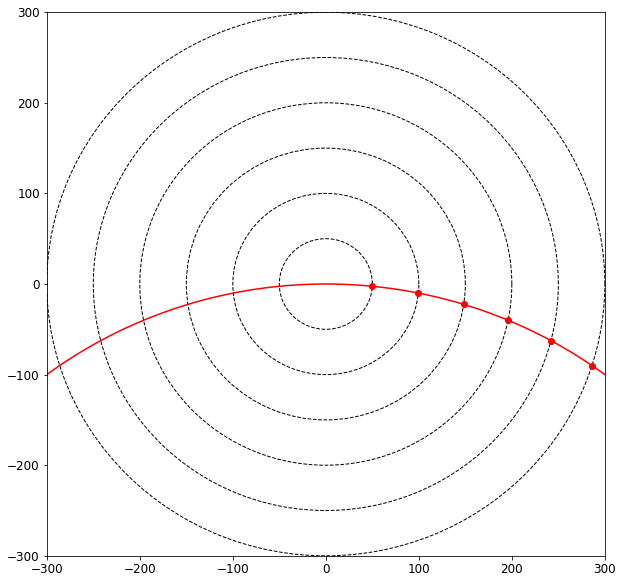

In [6]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 300
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax)

phi=0
pt=500
z0 = +150
theta = 100*np.pi/400
xs, ys, zs, rs, layers, becs = detGeo.getHits3D(pt,phi,theta, z0,+1)
print(xs)
print(ys)
print(np.sqrt(xs**2+ys**2))
print(rs)

drawTrackXY(pt,phi,+1,scale=1000)
plt.plot(xs,ys,'ro')

fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 400
ax.set_xlim((-600, 600))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorZR(ax)
drawTrackZR(theta,z0,+1,2*zoom)
plt.plot(zs,rs,'ro')
print("zs",zs)
print("rs",rs)




## Get Truth Tracks



In [7]:
np.random.seed(42)

# Kaggle formats
eventParticles = []
eventTruth = []
eventHits = []

# For plotting 
solutions = []


nTrk = 50*3
hitID = 0

for trkI in range(nTrk):
    ptInv = np.random.uniform(0.01*0.001,3*0.001,1)[0]
    z0    = np.random.uniform(-150,150,1)[0]
    theta = np.random.uniform(3*np.pi/4,np.pi/4,1)[0]
    phi   = np.random.uniform(0.0,2*np.pi,1)[0]
    q     = 2*np.random.randint(0,2,1)[0]-1
    pt = 1./ptInv

    eventParticles.append((trkI,pt,phi,theta,z0,q,6))

    xHits, yHits, zHits, rHits, layers, becs = detGeo.getHits3D(pt,phi,theta, z0,q)

    solutions.append([xHits,yHits,zHits, rHits, pt,phi,theta, z0,q])
    for hitItr in range(len(xHits)):
        # hit_id, particle_id, tx, ty, tz, weight (=1 for now)
        eventTruth.append((hitID,trkI,xHits[hitItr],yHits[hitItr],zHits[hitItr],1.0))
        eventHits .append((hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr))        
        hitID += 1

/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:138: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:139: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:136: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:137: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))


## Make reconstructed hits from truth Hits  (add smearing and noise later)

In [8]:

recHits = np.array(eventHits)

np.random.seed(42)
shuffle_index = np.random.permutation(len(recHits))
recHits = recHits[shuffle_index]
recHits[0:10]


array([[  70.        , -195.6843373 ,  155.58804625,   82.91285308,
           4.        ],
       [ 827.        , -246.14294184, -171.50408794, -118.82280887,
           5.        ],
       [ 231.        , -123.35021398, -157.43165092,  -88.00418038,
           3.        ],
       [ 588.        ,   22.58412772,  -44.60893604,  -48.02067742,
           0.        ],
       [  39.        , -134.81201565, -147.73530531, -145.02959034,
           3.        ],
       [ 731.        , -299.82596908,   10.2170575 , -349.18580388,
           5.        ],
       [ 299.        , -226.23668049, -197.02021318,   16.91587044,
           5.        ],
       [ 110.        ,  -35.9717672 ,  145.62291016, -173.41565877,
           2.        ],
       [  72.        ,   14.51027241,   47.8482183 ,   88.83573474,
           0.        ],
       [  86.        ,   85.25302691,  123.41767054,  -55.64450911,
           2.        ]])

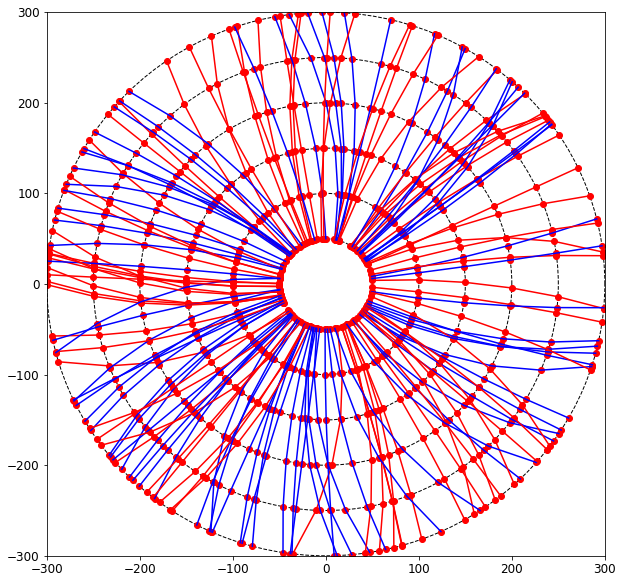

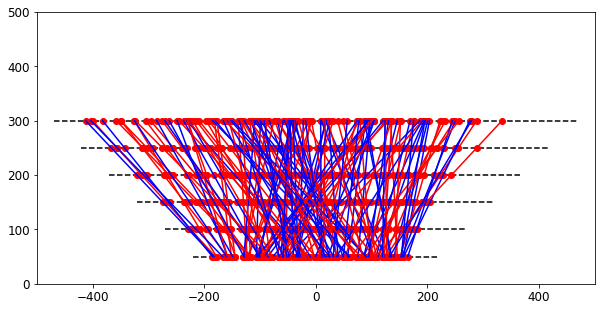

In [9]:



fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 300
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax)
plt.plot(recHits[:,1],recHits[:,2],'ro')

for s in solutions:
    color = "b" if (s[8] < 0) else "r"
    plt.plot(s[0],s[1],color)
    
fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 500
ax.set_xlim((-500, 500))
ax.set_ylim((0, zoom))

detGeo.drawDetectorZR(ax)

plt.plot(recHits[:,3],np.sqrt(recHits[:,2]**2+recHits[:,1]**2),'ro')
for s in solutions:
    color = "b" if (s[8] < 0) else "r"
    plt.plot(s[2],s[3],color)


# Test "Offline"  algorithm (ie: Hough transform) works

First try one track

### Implement the Hough transform

In [10]:
from TrackHelper import getPhiCircle
# given global posision and phi range, return consistent 1/rC
def getHT(hitR, hitPhi, phi):
    # Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi

    phi_circle = getPhiCircle(phi,1)

    f = 2/hitR*(np.cos(hitPhi-phi_circle))
    return f

In [11]:
# given global posision and z0 range, return consistent theta
def getHT_ZR(hitZ, hitR, z):
    
        
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    f = np.arctan2(hitR,(hitZ - z))
    return f

## Try on one track first

 Draw the track

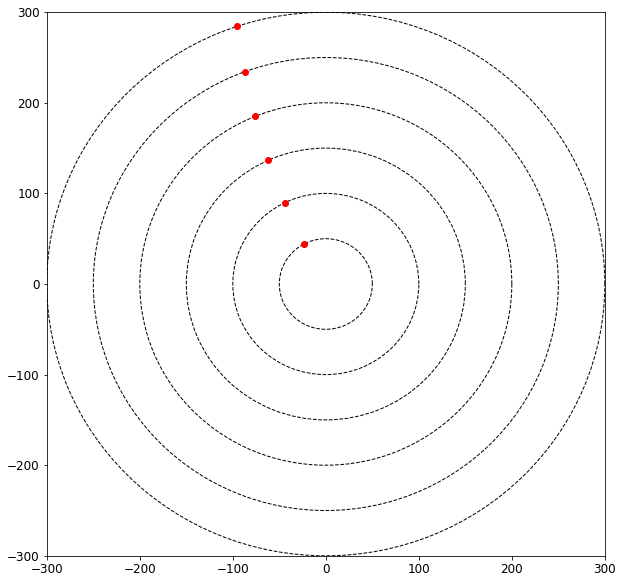

In [12]:
sTest = solutions[1]
testX = np.array(sTest[0])
testY = np.array(sTest[1])
testZ = np.array(sTest[2])
testR = np.array(sTest[3])

fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 300
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax)
plt.plot(testX,testY,'ro')

    
fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 500
ax.set_xlim((-500, 500))
ax.set_ylim((0, zoom))

detGeo.drawDetectorZR(ax)
plt.plot(testZ,testR,'ro')



Truth Track, 1/Rc / phi / theta / z0 / q 0.0013430399310322375 2.096753042388008 1.6348080176077344 -120.00752525459913 1
-173.21248843334544 -73.21248843334544
-226.41745161209172 -26.417451612091753
-279.62241479083804 20.377585209161964
-332.8273779695843 67.17262203041565
-386.0323411483306 113.96765885166934
-439.2373043270769 160.76269567292306


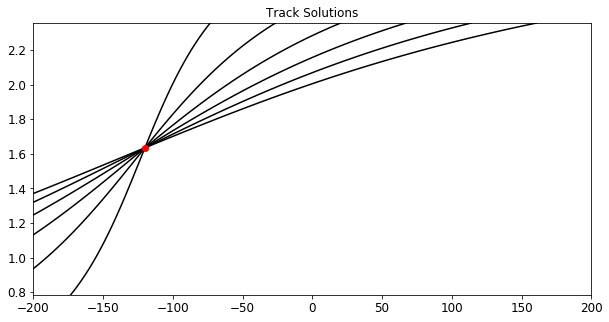

In [13]:
plt.figure(1, figsize=(10, 5))
plt.title(" Track Solutions")
plt.axis([0, 2*np.pi, -3*0.001,3*0.001])  

plt.figure(2, figsize=(10, 5))
plt.title("Track Solutions")
plt.axis([-200, 200, np.pi/4,3*np.pi/4]) 

soln = solutions[1]

truePhi = soln[5]
trueQ   = soln[8]
trueRc  = soln[4]
trueTheta = soln[6]
trueZ0    = soln[7]
print("Truth Track, 1/Rc / phi / theta / z0 / q",1./trueRc,truePhi,trueTheta, trueZ0, trueQ)

m_max = np.tan(np.pi/4)
m_min = np.tan(3*np.pi/4)

for hitItr in range(len(soln[0])):

    hitX = soln[0][hitItr]
    hitY = soln[1][hitItr]
    hitZ = soln[2][hitItr]
    hitR = soln[3][hitItr]

    hitPhi = np.arctan2(hitY, hitX)   

    # Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    
    # Only consider plasiblel track (eg: from the orgin)
    phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, 500)
    
    f = getHT(hitR, hitPhi,  phiXRange)

    plt.figure(1)
    plt.plot(phiXRange,f,"k")
    
    plt.figure(2)
    # Only consider plasiblel track (eg: from the orgin)

    #phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, 500)
    z0Min = hitZ-(hitR/m_max)
    z0Max = hitZ-(hitR/m_min)    
    print(z0Min,z0Max)
    z0Range = np.linspace(z0Min, z0Max, 100)
    f = getHT_ZR(hitZ, hitR,  z0Range)
    plt.plot(z0Range,f,"k")

plt.figure(1)
plt.plot(truePhi,trueQ*1/trueRc,"ro")   

plt.figure(2)
plt.plot(trueZ0,trueTheta,"ro")    


plt.show()

## Try it on a few tracks

Truth Track, 1/Rc / phi / theta / z0 / q 0.0011298749553536138 3.761482191925223 1.2063810951588725 135.21429192297484 -1
Truth Track, 1/Rc / phi / theta / z0 / q 0.0013430399310322375 2.096753042388008 1.6348080176077344 -120.00752525459913 1
Truth Track, 1/Rc / phi / theta / z0 / q 0.0021271370076101762 5.230391369746984 0.8326636570941031 -143.82465171125926 1
Truth Track, 1/Rc / phi / theta / z0 / q 1.2328509864632842e-05 3.843130151069924 1.3862568030053601 147.66346778736528 -1
Truth Track, 1/Rc / phi / theta / z0 / q 0.0013015156057399262 0.8764657756906659 1.3950982106236065 -62.63125794058743 1


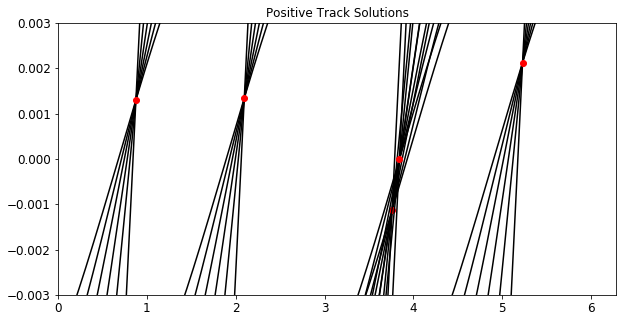

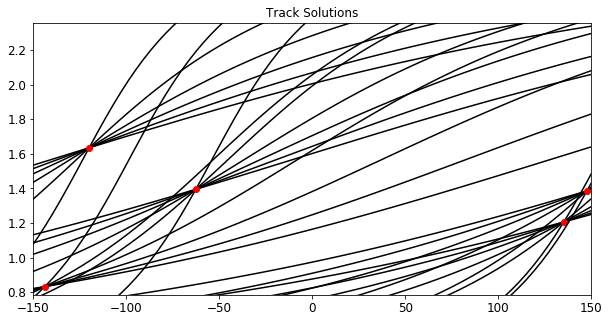

In [14]:
nTracks = 5 

plt.figure(1, figsize=(10, 5))
plt.title("Positive Track Solutions")
plt.axis([0, 2*np.pi, -3*0.001,3*0.001])  

plt.figure(2, figsize=(10, 5))
plt.title("Track Solutions")
plt.axis([-150, 150, np.pi/4,3*np.pi/4])

# Loop on Tracks
for solnItr in range(nTracks):

    
    soln = solutions[solnItr]
    truePhi = soln[5]
    trueQ   = soln[8]
    trueRc  = soln[4]
    trueTheta = soln[6]
    trueZ0    = soln[7]
    print("Truth Track, 1/Rc / phi / theta / z0 / q",1./trueRc,truePhi,trueTheta, trueZ0, trueQ)

    # Loop on hits
    for hitItr in range(len(soln[0])):

        hitX = soln[0][hitItr]
        hitY = soln[1][hitItr]
        hitZ = soln[2][hitItr]
        hitR = soln[3][hitItr]
        
        hitPhi = np.arctan2(hitY, hitX)   
    
        # Convert 0-2Pi
        if hitPhi<0: hitPhi += 2*np.pi
    
        # Only consider plasiblel track (eg: from the orgin)
        phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, 500)

        
        f = getHT(hitR, hitPhi,  phiXRange)

        plt.figure(1)
        plt.plot(phiXRange,f,"k")

        plt.figure(2)
        z0Range = np.linspace(-200, 200, 100)
        
        f = getHT_ZR(hitZ, hitR,  z0Range)
        
        plt.plot(z0Range,f,"k")
        
    plt.figure(1)        
    plt.plot(truePhi,trueQ*1/trueRc,"ro")   
    plt.figure(2)
    plt.plot(trueZ0,trueTheta,"ro")    

plt.show()

# HT Algorithm

Basic idea here is to run the 2D HT algo twice.
First with theta/z0 with coarse binning to get the hits input in to the second HT
which will be Q/pt and phi

## First lets try to run the 2D HT algros seperately

In [15]:
from HTTrackFinder import HTTrackFinding

def getHTForTrackFinding(hitR,hitPhi,phi):
    #Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    phi_circle = phi - np.pi/2
    return 2/hitR*(np.cos(hitPhi-phi_circle))

In [ ]:
HTFinderPtPhi = HTTrackFinding(0,2*np.pi,200,-3*0.001,3*0.001,400,getHTFunction=getHTForTrackFinding) 

fig, ax = plt.subplots(1, figsize=(20,10))

#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    #hitZ   = hitInfo[3]    
    hitLay = int(hitInfo[4])
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    hitPhi = np.arctan2(hitY, hitX)
    if hitPhi<0: hitPhi += 2*np.pi
    
    HTFinderPtPhi.addHit(hitLay, hitID, hitR, hitPhi)


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))

    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(HTFinderPtPhi.xBins, HTFinderPtPhi.yBins)
cmap = plt.get_cmap('binary')

HTFinderPtPhi.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-3*0.001,3*0.001)
H = np.array(HTFinderPtPhi.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = HTFinderPtPhi.findTracks()
for rT in recoTracks:
    recPhi, recCurv, recQ  = rT[0]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [ ]:
solns = HTFinderPtPhi.getSolutions()

truthArr = np.array(eventTruth)
truthArr = np.delete(truthArr, 2, axis=1)
truthArr = np.delete(truthArr, 2, axis=1)
import pandas as pd
truthDict = {
    "hit_id" : pd.Series(truthArr[:,0]),
    "particle_id" : pd.Series(truthArr[:,1]),    
    "weight" : pd.Series(truthArr[:,3]),
}

truth = pd.DataFrame(truthDict)

In [ ]:
from trackml.score import score_event

score_event(truth,solns)

In [16]:
# given global posision and z0 range, return consistent theta
def getHT_ZRForTracking(hitZ, hitR, z):
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    f = np.arctan2(hitR,(hitZ - z))
    return f

In [ ]:
HTFinderZTheta = HTTrackFinding(-150,150,200,np.pi/4,3*np.pi/4,400,getHTFunction=getHT_ZRForTracking) 

fig, ax = plt.subplots(1, figsize=(20,10))

#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]    
    hitLay = int(hitInfo[4])
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    
    HTFinderZTheta.addHit(hitLay, hitID, hitZ, hitR,doRangeCut=False)


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    trueZ0  = part[4]
    trueTheta  = part[3]

    ax.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(HTFinderZTheta.xBins, HTFinderZTheta.yBins)
cmap = plt.get_cmap('binary')

HTFinderZTheta.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(-150,150)
ax.set_ylim(np.pi/4,3*np.pi/4)
H = np.array(HTFinderZTheta.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = HTFinderZTheta.findTracks()
for rT in recoTracks:
    recZ0, recTheta, recQ  = rT[0]

    ax.plot(recZ0,recTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [ ]:
solnsZT = HTFinderZTheta.getSolutions()
score_event(truth,solnsZT)

OK Lets set up a coarse gain track finding in Ztheta Then we can iterate over it and do a fine grain track finding in pt-phi

In [ ]:
#HTFinderZThetaCoarse = HTTrackFinding(-150,150,7,np.pi/4,3*np.pi/4,10,getHTFunction=getHT_ZRForTracking) 
HTFinderZThetaCoarse = HTTrackFinding(-150,150,20,np.pi/4,3*np.pi/4,20,getHTFunction=getHT_ZRForTracking) 


#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]    
    hitLay = int(hitInfo[4])
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    
    HTFinderZThetaCoarse.addHit(hitLay, hitID, hitZ, hitR,doRangeCut=False)



HTFinderZThetaCoarse.combineLayerMaps()



Test functions to get hits 

In [ ]:
matchedHits = HTFinderZThetaCoarse.getHitsInBin(4,6,recHits)


In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 300
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax)
plt.plot(matchedHits[:,1],matchedHits[:,2],'ro')

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 500
ax.set_xlim((-500, 500))
ax.set_ylim((0, zoom))

detGeo.drawDetectorZR(ax)

plt.plot(matchedHits[:,3],np.sqrt(matchedHits[:,2]**2+matchedHits[:,1]**2),'ro')


Loop on regions in the Coarse (z0-theta) HT finder and run the fine (phi-pt) HT finding

In [ ]:
allRecoTracks = []
for iX in range(HTFinderZThetaCoarse.nXBins-1):
    for iY in range(HTFinderZThetaCoarse.nYBins-1):
        thisMatchedHits = HTFinderZThetaCoarse.getHitsInBin(iX,iY,recHits)
        
        if len(thisMatchedHits) < 5: continue
        
        HTFinderPtPhiFine = HTTrackFinding(0,2*np.pi,200,-3*0.001,3*0.001,400,getHTFunction=getHTForTrackFinding) 

        thisZ0    = HTFinderZThetaCoarse.HitDB.getXCenter(iX)
        thisTheta = HTFinderZThetaCoarse.HitDB.getYCenter(iY) 
        
        #
        # Loop on rec hits
        # 
        for hitInfo in thisMatchedHits:
            hitID  = hitInfo[0]
            hitX   = hitInfo[1]    
            hitY   = hitInfo[2]    
            hitLay = int(hitInfo[4])
            
            # convert to r and phi
            hitR = np.sqrt(hitX**2 + hitY**2)
            hitPhi = np.arctan2(hitY, hitX)
            if hitPhi<0: hitPhi += 2*np.pi
            
            HTFinderPtPhiFine.addHit(hitLay, hitID, hitR, hitPhi)  
        
        HTFinderPtPhiFine.combineLayerMaps()
        recoTracks = HTFinderPtPhiFine.findTracks()

        #
        #  Add the Z0 and theta measurements
        #
        for t in recoTracks:
            t[0].append(thisZ0)
            t[0].append(thisTheta)
        
        allRecoTracks += recoTracks
        
        for rt in recoTracks:
            HTFinderZThetaCoarse.removeHitsFromTrack(rt,removeOverlap=False)

        print(iX,iY,len(recoTracks),len(thisMatchedHits))


In [ ]:

allRecoTracks

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))

#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))

    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')


#
#  Tracks
#
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-3*0.001,3*0.001)
for rT in allRecoTracks:
    recPhi, recCurv, recQ  = rT[0]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')


        
plt.show()

In [ ]:
solnsAll = HTFinderPtPhiFine.getSolutionsFromTracks(allRecoTracks)
score_event(truth,solnsAll)


In [ ]:
solnsAll["hit_id"].value_counts()

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))

X, Y = np.meshgrid(HTFinderZThetaCoarse.xBins, HTFinderZThetaCoarse.yBins)
cmap = plt.get_cmap('binary')

HTFinderZThetaCoarse.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(-150,150)
ax.set_ylim(np.pi/4,3*np.pi/4)
H = np.array(HTFinderZThetaCoarse.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

        
plt.show()

# Now lets try adding track fitting 

First do the road finding as above

In [17]:
#HTFinderZThetaCoarse = HTTrackFinding(-150,150,7,np.pi/4,3*np.pi/4,10,getHTFunction=getHT_ZRForTracking) 
HTFinderZThetaCoarseFitting = HTTrackFinding(-150,150,20,np.pi/4,3*np.pi/4,20,getHTFunction=getHT_ZRForTracking) 


#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]    
    hitLay = int(hitInfo[4])
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    
    HTFinderZThetaCoarseFitting.addHit(hitLay, hitID, hitZ, hitR,doRangeCut=False)


HTFinderZThetaCoarseFitting.combineLayerMaps()



In [18]:
allRecoRoads = []
for iX in range(HTFinderZThetaCoarseFitting.nXBins-1):
    for iY in range(HTFinderZThetaCoarseFitting.nYBins-1):
        thisMatchedHits = HTFinderZThetaCoarseFitting.getHitsInBin(iX,iY,recHits)
        
        if len(thisMatchedHits) < 5: continue
        
        HTFinderPtPhiFine = HTTrackFinding(0,2*np.pi,200,-3*0.001,3*0.001,400,getHTFunction=getHTForTrackFinding) 

        thisZ0    = HTFinderZThetaCoarseFitting.HitDB.getXCenter(iX)
        thisTheta = HTFinderZThetaCoarseFitting.HitDB.getYCenter(iY)        
        
        #
        # Loop on rec hits
        # 
        for hitInfo in thisMatchedHits:
            hitID  = hitInfo[0]
            hitX   = hitInfo[1]    
            hitY   = hitInfo[2]    
            hitLay = int(hitInfo[4])
            
            # convert to r and phi
            hitR = np.sqrt(hitX**2 + hitY**2)
            hitPhi = np.arctan2(hitY, hitX)
            if hitPhi<0: hitPhi += 2*np.pi
            
            HTFinderPtPhiFine.addHit(hitLay, hitID, hitR, hitPhi)  
        
        HTFinderPtPhiFine.combineLayerMaps()
        recoRoads = HTFinderPtPhiFine.findTracks(overlapLogicFirstHit=False)

        #
        #  Add the Z0 and theta measurements
        #
        for r in recoRoads:
            r[0].append(thisZ0)
            r[0].append(thisTheta)
        
        allRecoRoads += recoRoads
        
        for rt in recoRoads:
            HTFinderZThetaCoarseFitting.removeHitsFromTrack(rt,removeOverlap=False)

        print(iX,iY,len(recoRoads),len(thisMatchedHits))


0 0 4 107
0 1 3 94
0 2 0 72
0 3 0 71
0 4 3 85
0 5 0 71
0 6 2 66
0 7 1 50
0 8 0 48
0 9 0 38
0 10 2 38
0 11 0 33
0 12 2 44
0 13 1 29
0 14 1 24
0 15 2 24
0 16 1 17
0 17 3 21
0 18 1 6
1 0 1 78
1 1 0 78
1 2 0 73
1 3 0 74
1 4 1 66
1 5 1 71
1 6 1 64
1 7 0 48
1 8 0 55
1 9 2 49
1 10 0 29
1 11 0 23
1 12 0 25
1 13 0 27
1 14 0 23
1 15 0 15
1 16 0 13
1 17 0 7
2 0 1 74
2 1 0 72
2 2 0 67
2 3 1 70
2 4 0 66
2 5 0 59
2 6 0 68
2 7 0 50
2 8 1 52
2 9 0 44
2 10 0 37
2 11 0 32
2 12 0 28
2 13 0 27
2 14 1 26
2 15 0 17
2 16 0 16
2 17 0 11
3 0 0 70
3 1 0 70
3 2 1 75
3 3 0 60
3 4 1 74
3 5 1 64
3 6 1 63
3 7 1 62
3 8 0 48
3 9 0 47
3 10 1 50
3 11 0 32
3 12 0 34
3 13 0 30
3 14 1 27
3 15 0 16
3 16 1 20
3 17 1 12
3 18 0 6
4 0 1 69
4 1 0 59
4 2 1 64
4 3 0 60
4 4 0 56
4 5 0 66
4 6 0 61
4 7 2 60
4 8 0 52
4 9 0 42
4 10 1 48
4 11 0 36
4 12 1 35
4 13 0 29
4 14 1 32
4 15 0 20
4 16 3 19
4 17 0 7
4 18 1 7
5 0 0 66
5 1 0 58
5 2 0 53
5 3 0 60
5 4 0 54
5 5 1 54
5 6 0 59
5 7 0 59
5 8 1 62
5 9 0 48
5 10 0 48
5 11 0 41
5 12 0 36
5 13

In [19]:
#print(recHits[:,2])
x2s = np.array(recHits[:,1]**2,dtype=float)
y2s = np.array(recHits[:,2]**2,dtype=float)

Rs = np.sqrt(x2s + y2s)
Phis = np.arctan2(recHits[:,2],recHits[:,1])
Phis[Phis<0] = Phis[Phis<0] +2*np.pi

recHitsNew = np.c_[recHits,Rs,Phis]

In [20]:
fittedTracks2D = HTFinderZThetaCoarseFitting.fitTracks(allRecoRoads,recHitsNew,0.01)
print(len(allRecoRoads))
print(len(fittedTracks2D))

150
135


In [21]:
fittedTracks2D[1]

[[3.539244254074466,
  0.0013569927633889298,
  1.0,
  -142.10526315789474,
  0.8267349088394192],
 [[42.0, 43.0, 44.0, 45.0, 46.0]],
 8.881784197001252e-16,
 8.881784197001252e-16,
 [0.0, 4.440892098500626e-16, 0.0, 4.440892098500626e-16, 0.0]]

In [113]:
fittedTracks3D = HTFinderZThetaCoarseFitting.fitTracks3D(allRecoRoads,recHitsNew,chi2Cut=5e1)
print(len(allRecoRoads))
print(len(fittedTracks2D))
print(len(fittedTracks3D))

150
135
141


/Users/johnda/Library/Python/3.6/lib/python/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


In [114]:
print(fittedTracks3D[0])
print(fittedTracks2D[0])


[[5.230391369746983, 0.002127137007610171, 1.0, -143.82465171125924, 0.8326636570941031], [[12.0, 13.0, 14.0, 15.0, 16.0, 17.0]], 1.2789769243681803e-13, 1.2789769243681803e-13, [1.4210854715202004e-14, 2.842170943040401e-14, 2.842170943040401e-14, 2.842170943040401e-14, 2.842170943040401e-14, 0.0]]
[[5.230391369746983, 0.002127137007610171, 1.0, -142.10526315789474, 0.8267349088394192], [[12.0, 13.0, 14.0, 15.0, 16.0, 17.0]], 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [115]:
solnsFitted = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(fittedTracks3D)
nTracksPerHit = solnsFitted["hit_id"].value_counts()


In [116]:
def printCounts(trackPerHit):
    for i in range(15):
        print(len(trackPerHit[trackPerHit > i]))
    #print(len(trackPerHit[trackPerHit > 1]))
    #print(len(trackPerHit[trackPerHit > 2]))
    #print(len(trackPerHit[trackPerHit > 3]))
    #print(len(trackPerHit[trackPerHit > 4]))


printCounts(solnsFitted["hit_id"].value_counts())
multiTperH = nTracksPerHit[nTracksPerHit > 1]


765
6
0
0
0
0
0
0
0
0
0
0
0
0
0


In [117]:
multiTperH

459.0    2
609.0    2
825.0    2
472.0    2
723.0    2
831.0    2
Name: hit_id, dtype: int64

In [118]:
multiTperH
HTFinderZThetaCoarseFitting.removeOverlap(fittedTracks3D,multiTperH.index)

In [119]:
solnsCleaned = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(fittedTracks3D)


In [120]:
printCounts(solnsCleaned["hit_id"].value_counts())


765
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [121]:
truthArr = np.array(eventTruth)
truthArr = np.delete(truthArr, 2, axis=1)
truthArr = np.delete(truthArr, 2, axis=1)
import pandas as pd
truthDict = {
    "hit_id" : pd.Series(truthArr[:,0]),
    "particle_id" : pd.Series(truthArr[:,1]),    
    "weight" : pd.Series(truthArr[:,3]),
}

truth = pd.DataFrame(truthDict)

In [122]:
from trackml.score import score_event
#print(score_event(truth,solnsAll))
#print(score_event(truth,solnsFitted))
print(score_event(truth,solnsCleaned))

0.7788888888888887


In [136]:
plt.figure(1, figsize=(20, 10))
plt.figure(1)
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-3*0.001,3*0.001)

plt.figure(2, figsize=(20, 10))
ax.set_xlim(-150,150)
ax.set_ylim(np.pi/4,3*np.pi/4)

#plt.title(" Track Solutions")
#plt.axis([0, 2*np.pi, -3*0.001,3*0.001])  

#plt.figure(2, figsize=(10, 5))
#plt.title("Track Solutions")
#plt.axis([-200, 200, np.pi/4,3*np.pi/4]) 

#fig, ax = plt.subplots(1, figsize=(20,10))

#    
# Plot Truth
#
for part in eventParticles:
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    trueZ0  = part[4]    
    trueTheta  = part[3]    
    #eventParticles.append((trkI,pt,phi,q,6))

    #ax.plot(truePhi,trueQ*1/trueRc,
    plt.figure(1)
    plt.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

    plt.figure(2)
    plt.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

#
#  Tracks
#
for trkIndex, rT in enumerate(allRecoRoads):
    recPhi, recCurv, recQ, recZ0, recTheta  = rT[0]
    plt.figure(1)
    plt.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')

    plt.figure(2)
    plt.plot(recZ0,recTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')

for fitIndex, fT in enumerate(fittedTracks3D):    
    fitPhi, fitCurv, fitQ, fitZ0, fitTheta  = fT[0]


    diffPhi = abs(recPhi - fitPhi)/recPhi
    diffCurv = abs(recCurv - fitCurv)
    #print(diffPhi,diffCurv)
    plt.figure(1)
    plt.plot(fitPhi,fitCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')
    
    plt.figure(2)
    plt.plot(fitZ0,fitTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

    

plt.show()

In [124]:
testRoad = allRecoRoads[0]

In [125]:
from HTTrackFinder import DORead
testRoadFullInfo = DORead(testRoad,recHitsNew)
print(testRoadFullInfo)

[[5.225463157478501, 0.002, 1.0, -142.10526315789474, 0.8267349088394192], array([[  12.        ,   22.41215081,  -44.69558699,  -98.34109304,
           0.        ,   50.        ,    5.17718785],
       [  13.        ,   39.99332318,  -91.65442761,  -52.85753436,
           1.        ,  100.        ,    5.12383298],
       [  14.        ,   52.52970378, -140.50135309,   -7.37397569,
           2.        ,  150.        ,    5.07017149],
       [  15.        ,   59.80123362, -190.85023567,   38.10958299,
           3.        ,  200.        ,    5.01603999],
       [  16.        ,   61.57799485, -242.29764867,   83.59314166,
           4.        ,  250.        ,    4.96126213],
       [  17.        ,   57.61593277, -294.41536015,  129.07670034,
           5.        ,  300.        ,    4.90564275]])]


In [126]:
from HTTrackFinder import drawTrackToFit
drawTrackToFit(testRoadFullInfo)

In [127]:
from HTTrackFinder import fitTrackXY
testTrack  = fitTrackXY(testRoadFullInfo,0.01)

In [128]:
testTrack

[[5.230391369746983,
  0.002127137007610171,
  1.0,
  -142.10526315789474,
  0.8267349088394192],
 array([[  12.        ,   22.41215081,  -44.69558699,  -98.34109304,
            0.        ,   50.        ,    5.17718785,    0.        ],
        [  13.        ,   39.99332318,  -91.65442761,  -52.85753436,
            1.        ,  100.        ,    5.12383298,    0.        ],
        [  14.        ,   52.52970378, -140.50135309,   -7.37397569,
            2.        ,  150.        ,    5.07017149,    0.        ],
        [  15.        ,   59.80123362, -190.85023567,   38.10958299,
            3.        ,  200.        ,    5.01603999,    0.        ],
        [  16.        ,   61.57799485, -242.29764867,   83.59314166,
            4.        ,  250.        ,    4.96126213,    0.        ],
        [  17.        ,   57.61593277, -294.41536015,  129.07670034,
            5.        ,  300.        ,    4.90564275,    0.        ]]),
 0.0,
 0.0]

In [129]:
from HTTrackFinder import drawTrackFit


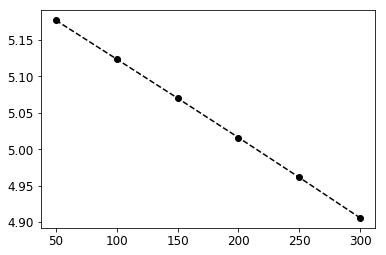

In [130]:
drawTrackToFit(testTrack,hitRIndex=5,hitPhiIndex=6)
drawTrackFit(testTrack)


In [131]:
from HTTrackFinder import drawTrackToFitZR


In [132]:
drawTrackToFitZR(testTrack,hitRIndex=5)
#drawTrackToFitZR(testRoadFullInfo,hitZIndex=5,color="r")
#testRoadFullInfo
testTrack

[[5.230391369746983,
  0.002127137007610171,
  1.0,
  -142.10526315789474,
  0.8267349088394192],
 array([[  12.        ,   22.41215081,  -44.69558699,  -98.34109304,
            0.        ,   50.        ,    5.17718785,    0.        ],
        [  13.        ,   39.99332318,  -91.65442761,  -52.85753436,
            1.        ,  100.        ,    5.12383298,    0.        ],
        [  14.        ,   52.52970378, -140.50135309,   -7.37397569,
            2.        ,  150.        ,    5.07017149,    0.        ],
        [  15.        ,   59.80123362, -190.85023567,   38.10958299,
            3.        ,  200.        ,    5.01603999,    0.        ],
        [  16.        ,   61.57799485, -242.29764867,   83.59314166,
            4.        ,  250.        ,    4.96126213,    0.        ],
        [  17.        ,   57.61593277, -294.41536015,  129.07670034,
            5.        ,  300.        ,    4.90564275,    0.        ]]),
 0.0,
 0.0]

In [133]:
print(testTrack[0][3:5])
p0 = [testTrack[0][3], np.tan(testTrack[0][4])]
print(p0)
drawTrackToFitZR(testTrack,hitRIndex=5)

from HTTrackFinder import drawTrackFitZR
drawTrackFitZR(testTrack,color="k")
#plt.plot(testTrack[1][:,3],fitFunZR(p0,testTrack[1][:,3]), "k--")

[-142.10526315789474, 0.8267349088394192]
[-142.10526315789474, 1.086289575112912]


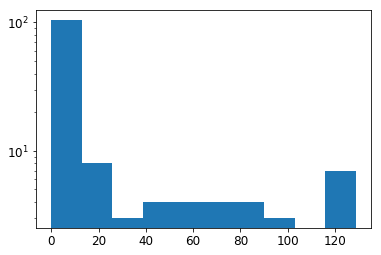

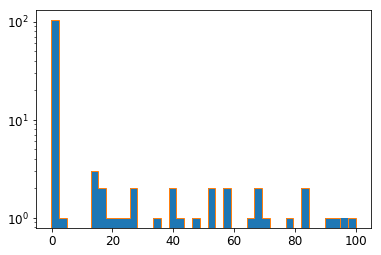

In [134]:
X2Before = []
X2After = []


for f in fittedTracks3D:

    X2Before.append(f[2])
    X2After  .append(f[3])
    
    
#print(X2Before)
#print(X2After)

plt.hist(X2After)#,np.linspace(-0.01,0.06,40))
plt.yscale('log', nonposy='clip')
plt.show()

plt.hist(X2Before)#,np.linspace(-0.01,0.06,40),histtype='step')
plt.yscale('log', nonposy='clip')
plt.show()

plt.hist(X2After,np.linspace(-0.01,100,40))
plt.hist(X2Before,np.linspace(-0.01,100,40),histtype='step')
plt.yscale('log', nonposy='clip')
plt.show()

#plt.hist(X2AfterZR)#,np.linspace(-0.01,0.06,40))
#plt.hist(X2BeforeZR)#,np.linspace(-0.01,0.06,40),histtype='step')
#plt.yscale('log', nonposy='clip')
#plt.show()
